In [ ]:
# coding: utf-8
import scipy.io as io
import numpy as np
import math
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
plt.gray();
import matplotlib.patheffects as pe
import seaborn as sb
from sklearn.manifold import TSNE 
from PIL import Image as img
from mpl_toolkits.mplot3d import Axes3D  # 进行3D图像绘制
# %matplotlib inline
# from IPython.display import display
infinity = float(-2**31)

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
train_data=torchvision.datasets.CIFAR10(root='cifar-10-batches-py/',train=True,
                                        download=False,transform=transform)
test_data=torchvision.datasets.CIFAR10(root='cifar-10-batches-py/',train=False,
                                        download=False,transform=transform)
train_loader=torch.utils.data.DataLoader(train_data,batch_size=200,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=200,shuffle=True)

In [ ]:
print()

In [7]:
num_label=10

def plot2D(x, colors,path_name):
    # 生成10种颜色出来
    palette = np.array(sb.color_palette("hls", num_label)) 
#     print(palette.shape)
    
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    # 将第一维和第二维作为xy坐标
    # lw: linewidth
    
    # set lable 
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)

    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, cmap="jet",marker="o", c=palette[colors.astype(np.int)])
    txts = []
    for i in range(num_label):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=32)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    plt.title('Cifar10-tSNE',fontsize = 38, color = 'black',backgroundcolor='white')
    plt.savefig(path_name)
#     plt.axis('on')
#     plt.show()
    return f, ax, txts

def plot3D(x, colors):
    # 生成10种颜色出来
    palette = np.array(sb.color_palette("hls", num_label)) 
#     print(palette.shape)
    
    f = plt.figure(figsize=(32, 32))
#     ax = plt.subplot(aspect='equal')
    ax = Axes3D(f)
    # 将第一维和第二维作为xy坐标
    # lw: linewidth
    
    # set lable 
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)
    ax.set_zlabel('Z', fontsize=10)

    sc = ax.scatter(x[:,0], x[:,1],x[:,2], lw=0, s=40, cmap="jet",marker="o", c=palette[colors.astype(np.int32)])
    txts = []
    for i in range(num_label):
        # Position of each label.
        xtext, ytext,ztext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext,ztext, str(i), fontsize=32)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    plt.title('Cifar10-tSNE',fontsize = 38, color = 'black',backgroundcolor='white')
    plt.savefig("Results/tSNE_original.png")
#     plt.axis('on')
#     plt.show()
    return f, ax, txts

torch.Size([200, 3072])
<class 'torch.Tensor'>
torch.Size([200])
(200, 3072)
<class 'numpy.ndarray'>
(200,)


D:\Anaconda3.5.3.1\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


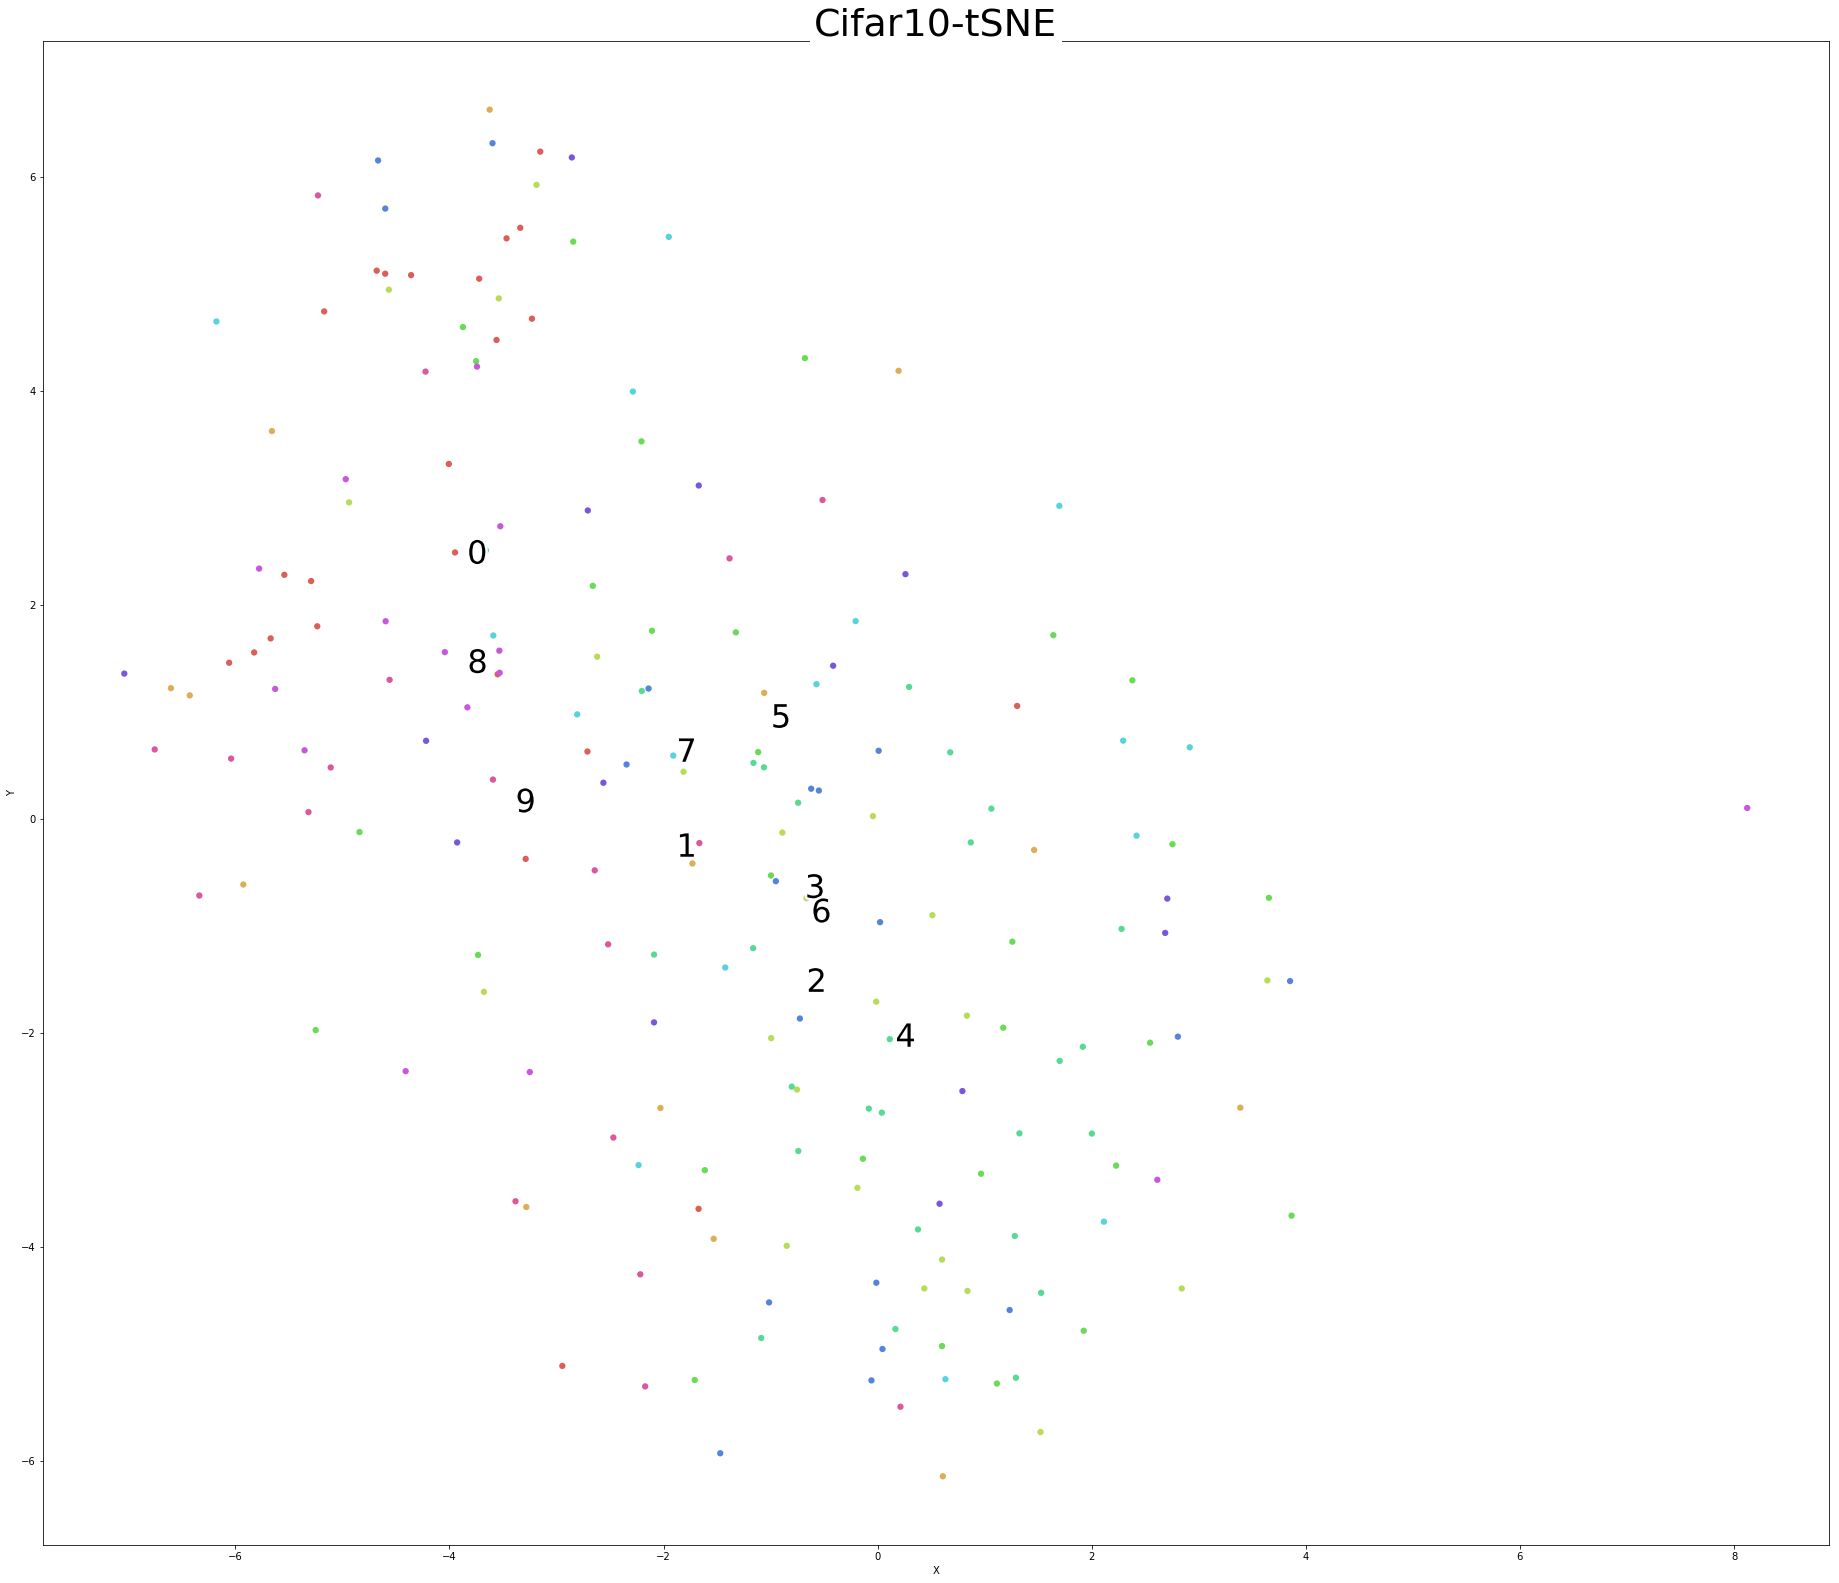

In [22]:
#  原始数据集
for batch in test_loader:
    X,Y=batch
    X=X.reshape(X.shape[0],-1)
    print(X.shape)
    print(type(Y))
    print(Y.shape)
#     print(X)
#     print(Y)
    
    X = np.vstack([X[(Y==i)] for i in range(num_label)]) 
    Y = np.hstack([Y[(Y==i)] for i in range(num_label)])
    
    tsne_output = TSNE(n_components=2,perplexity=50,n_iter=5000).fit_transform(X) 
    plot2D(tsne_output,Y)
    
#     tsne_output = TSNE(n_components=3,perplexity=10,n_iter=3000).fit_transform(X) 
#     plot3D(tsne_output,Y)
    break
# plot2D(tsne_output[:,0:2],Y)

target shape:  (50000, 10)
output shape:  (50000, 1)


(<Figure size 2304x2304 with 1 Axes>,
 [Text(-8.86486,-5.33908,'0'),
  Text(-58.4939,3.00168,'1'),
  Text(9.59618,-11.9021,'2'),
  Text(27.0094,11.2162,'3'),
  Text(27.8018,-17.8706,'4'),
  Text(37.8714,8.51446,'5'),
  Text(10.7308,22.0814,'6'),
  Text(54.3485,-16.9945,'7'),
  Text(-28.6376,9.29445,'8'),
  Text(-46.4753,-7.76666,'9')])

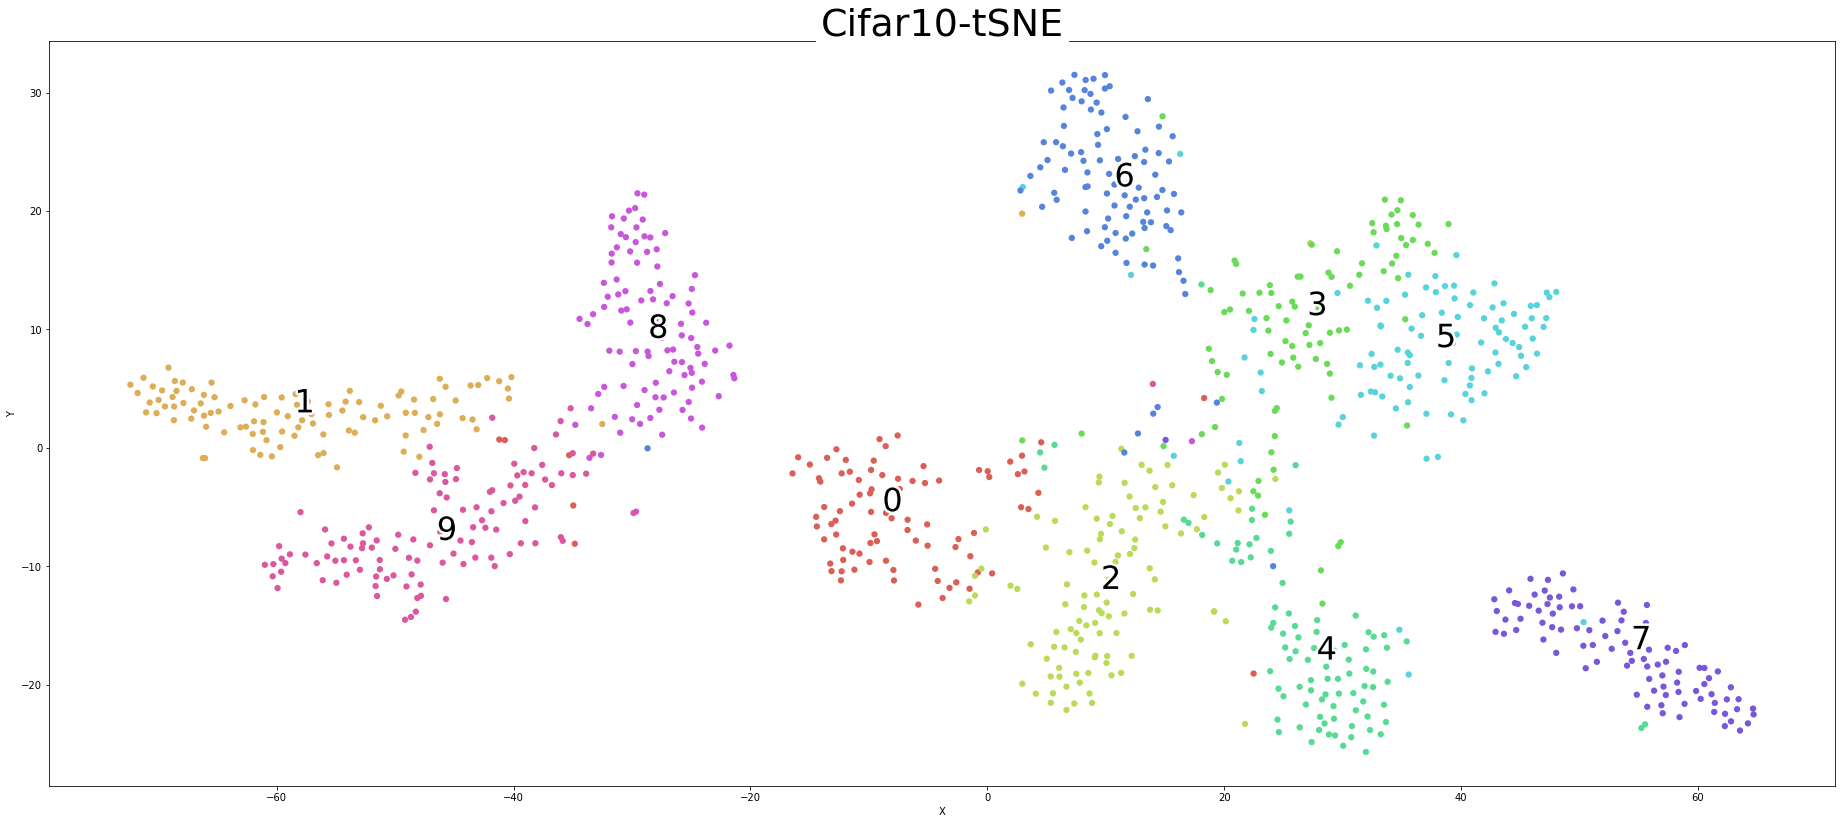

In [9]:
# 网络输出 训练集
X = np.load('Results/ZFNet_output.npy').astype(np.float64)
Y = np.load('Results/ZFNet_target.npy')
print('target shape: ', X.shape)
print('output shape: ', Y.shape)

# X=X.reshape(X.shape[0],-1)
# print(X.shape)
# print(type(Y))
X=X[0:1000,:]
Y=Y[0:1000,:]
# print('target shape: ', X.shape)
# print('output shape: ', Y.shape)
#     print(X)
#     print(Y)

X = np.vstack([X[(Y == i)[:, 0]] for i in range(num_label)])
Y = np.vstack([Y[(Y == i)[:, 0]] for i in range(num_label)])

tsne_output = TSNE(n_components=2, perplexity=30, n_iter=5000).fit_transform(X)
# print(tsne_output.shape)
# print(tsne_output)
plot2D(tsne_output, Y[:, 0], "Results/tSNE_ZFNet.png")

target shape:  (10000, 10)
output shape:  (10000, 1)


(<Figure size 2304x2304 with 1 Axes>,
 [Text(-14.5137,-8.40887,'0'),
  Text(-1.24525,-48.3873,'1'),
  Text(-6.70202,8.06088,'2'),
  Text(13.958,17.9254,'3'),
  Text(-11.2147,31.2117,'4'),
  Text(14.4005,29.0449,'5'),
  Text(15.6027,-0.688145,'6'),
  Text(-1.50848,46.4249,'7'),
  Text(-17.4152,-27.4121,'8'),
  Text(10.5419,-39.4011,'9')])

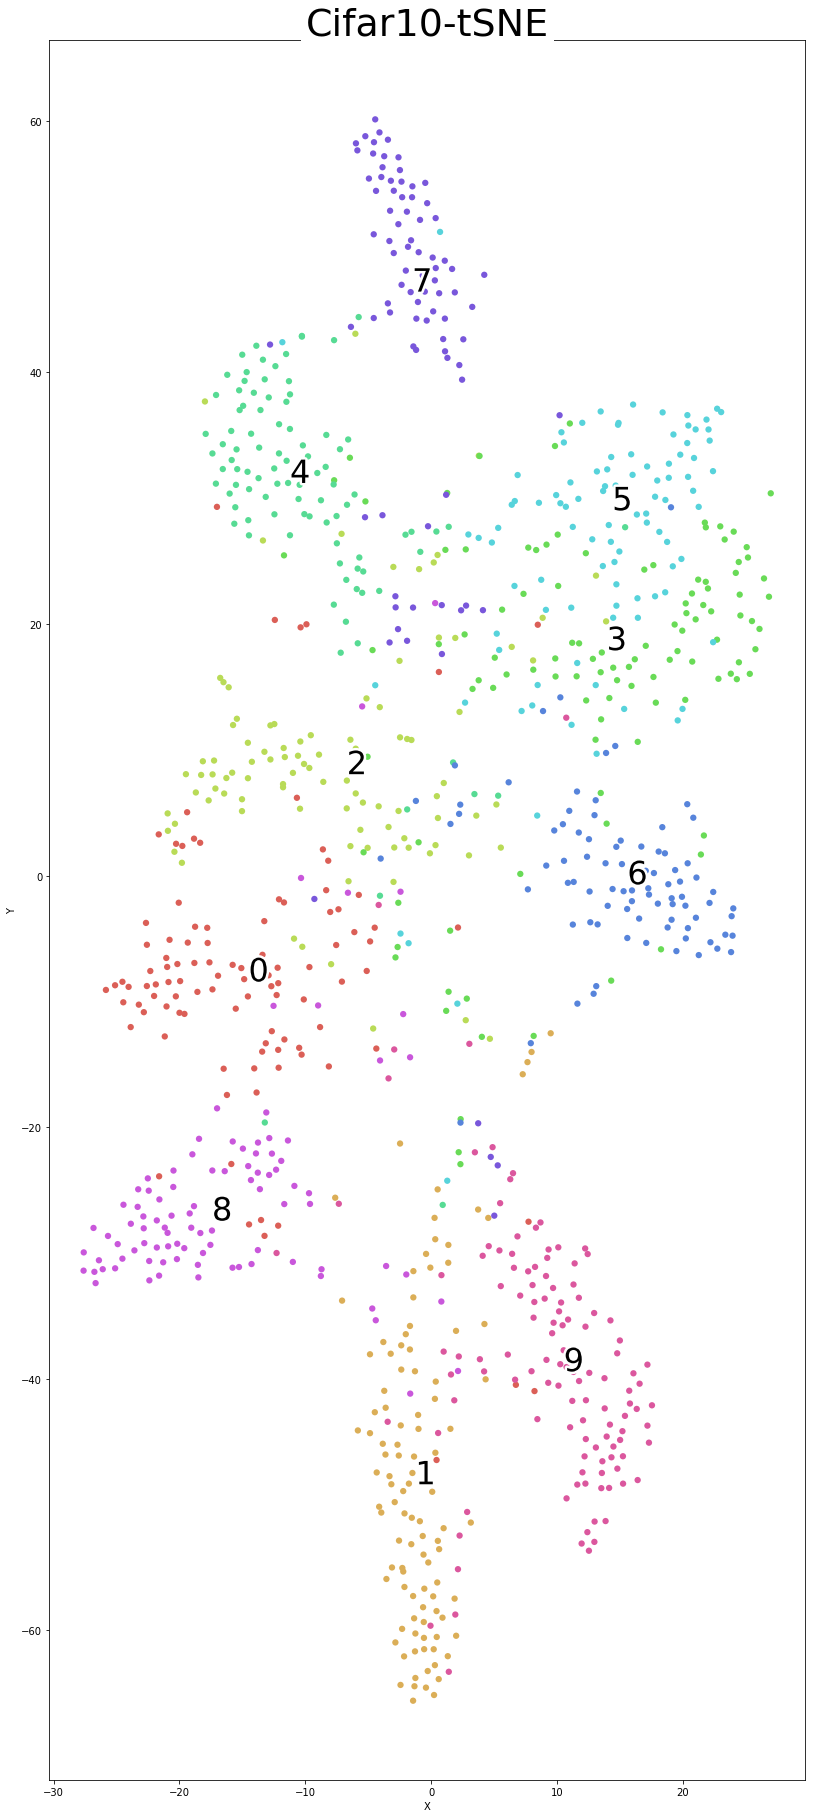

In [12]:
# 网络输出 测试集
X_test = np.load('Results/ZFNet_test_output.npy').astype(np.float64)
Y_test = np.load('Results/ZFNet_test_target.npy')
print('target shape: ', X_test.shape)
print('output shape: ', Y_test.shape)

# X=X.reshape(X.shape[0],-1)
# print(X.shape)
# print(type(Y))
X_test=X_test[0:1000,:]
Y_test=Y_test[0:1000,:]
# print('target shape: ', X.shape)
# print('output shape: ', Y.shape)
#     print(X)
#     print(Y)

X_test = np.vstack([X_test[(Y_test == i)[:, 0]] for i in range(num_label)])
Y_test = np.vstack([Y_test[(Y_test == i)[:, 0]] for i in range(num_label)])

tsne_output = TSNE(n_components=2, perplexity=30, n_iter=5000).fit_transform(X_test)
# print(tsne_output.shape)
# print(tsne_output)
plot2D(tsne_output, Y_test[:, 0],
       "Results/tSNE_ZFNet_test.png")

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np


class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, 11, 4, 2),  # 11+4*54<228=224+2*2
            nn.ReLU(),
            nn.MaxPool2d(3, 2),  # 3+2*26=55
            nn.Conv2d(96, 192, 5, 1, 2),  # 5+26=31=27+2*2
            nn.ReLU(),
            nn.MaxPool2d(3, 2),  # 3+2*12=27
            nn.Conv2d(192, 384, 3, 1, 1),  #3+12=15=13+1*2
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, 1, 1),  #3+12=15=13+1*2
            nn.ReLU(),
            # nn.Conv2d(256, 128, 3, 1, 1),  #3+12=15=13+1*2
            nn.Conv2d(256, 256, 3, 1, 1),  #3+12=15=13+1*2
            nn.ReLU(),
            # nn.MaxPool2d(3, 2),  # 3+2*5=13
            nn.MaxPool2d(5, 2, 1),  # 5+2*5=13+1*2
        )
        # self.features = nn.Sequential(
        #     nn.Conv2d(3, 64, 11, 4, 2),  # 11+4*54<228=224+2*2
        #     nn.ReLU(),
        #     nn.MaxPool2d(3, 2),  # 3+2*26=55
        #     nn.Conv2d(64, 128, 5, 1, 2),  # 5+26=31=27+2*2
        #     nn.ReLU(),
        #     nn.MaxPool2d(3, 2),  # 3+2*12=27
        #     nn.Conv2d(128, 256, 3, 1, 1),  #3+12=15=13+1*2
        #     nn.ReLU(),
        #     nn.Conv2d(256, 512, 3, 1, 1),  #3+12=15=13+1*2
        #     nn.ReLU(),
        #     nn.Conv2d(512, 128, 3, 1, 1),  #3+12=15=13+1*2
        #     # nn.Conv2d(256, 256, 3, 1, 1),  #3+12=15=13+1*2
        #     nn.ReLU(),
        #     nn.MaxPool2d(3, 2),  # 3+2*5=13
        #     # nn.MaxPool2d(5, 2, 1),  # 5+2*5=13+1*2
        # )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            # nn.Linear(128 * 6 * 6, 4096),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(),
            nn.Dropout(),
            # nn.Linear(4096, 4096),  # 1024
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(1024, 10))
        # nn.Linear(4096, 10))

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x.view(-1, 256 * 6 * 6))
        # x = self.classifier(x.view(-1, 128 * 6 * 6))
        return x


transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.465, 0.406], [0.229, 0.224, 0.225]),
])

train_data = dset.CIFAR10(root='cifar-10-batches-py',
                          train=True,
                          transform=transform,
                          download=False)
test_data = dset.CIFAR10(root='cifar-10-batches-py',
                         train=False,
                         transform=transform,
                         download=False)
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=16,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=16,
                                          shuffle=True)



In [64]:
print(train_data.data.shape)
print(train_data[0][1])
print(train_data[0][0].shape)
print(train_data[0][0][0].shape)
print(train_data[0][0][1].shape)

print(train_data.data[49999].shape)

# print(type(train_data.labels))

(50000, 32, 32, 3)
6
torch.Size([3, 224, 224])
torch.Size([224, 224])
torch.Size([224, 224])
(32, 32, 3)


In [60]:
import pickle 
def load_file(filename): 
    with open(filename, 'rb') as fo: 
        data = pickle.load(fo, encoding='latin1') 
        return data
data = load_file('cifar-10-batches-py/test_batch')
print(data.keys())
print(type(data['filenames']))
print(data['data'].shape)

dict_keys(['batch_label', 'labels', 'data', 'filenames'])
<class 'list'>
(10000, 3072)


In [ ]:
train_len = len(train_data)
test_len = len(test_data)
print("AlexNet")
print(train_len, test_len)

if __name__ == '__main__':

    model = AlexNet()
    # model = model.cuda()
    optimzer = optim.SGD(model.parameters(), lr=0.01)

    print("batch_b16 pool5 nn.Linear(256 * 6 * 6, 4096) 128改256")
    for epoch in range(10):
        total_loss = 0
        train_correct = 0
        test_correct = 0
        cnt = 0
        for batch in train_loader:
            # cnt += len(data)
            # print("processing: %d/%d" % (cnt, len(train_loader.dataset)))
            images, labels = batch
            outs = model(images)
            loss = F.cross_entropy(outs, labels)
            # outs = model(images.cuda())
            # loss = F.cross_entropy(outs, labels.cuda())
            total_loss += loss.item()
            optimzer.zero_grad()
            loss.backward()
            optimzer.step()
            # train_correct += outs.argmax(dim=1).eq(labels.cuda()).sum().item()
            train_correct += outs.argmax(dim=1).eq(labels).sum().item()

        for batch in test_loader:
            images, labels = batch
            out = model(images)
            test_correct += out.argmax(dim=1).eq(labels).sum().item()
            # out = model(images.cuda())
            # test_correct = out.argmax(dim=1).eq(labels.cuda()).sum().item()
        train_correct = train_correct / train_len
        test_correct = test_correct / test_len
        print(epoch, ' -- total_loss:', total_loss, '  train_correct:',
              train_correct, '  test_correct:', test_correct)

    out_output = []
    out_target = []
    out_data = []
    # cnt=0
    # print("save final train output")
    for batch in train_loader:
        # cnt += len(data)
        # print("processing: %d/%d" % (cnt, len(train_loader.dataset)))
        images, labels = batch
        outs = model(images)

        output_np = outs.data.numpy()
        target_np = labels.data.numpy()
        data_np = images.data.numpy()
        out_output.append(output_np)
        out_target.append(target_np[:, np.newaxis])  #(10,)变(10,1)
        out_data.append(np.squeeze(data_np))

    output_array = np.concatenate(out_output, axis=0)
    target_array = np.concatenate(out_target, axis=0)
    data_array = np.concatenate(out_data, axis=0)
    # 不允许序列化
    np.save('out/AlexNet_b16_p5_256_output.npy',
            output_array,
            allow_pickle=False)
    np.save('out/AlexNet_b16_p5_256_target.npy',
            target_array,
            allow_pickle=False)
    # np.save('out/AlexNet_b8_data.npy', data_array, allow_pickle=False)

    out_output = []
    out_target = []
    out_data = []
    # cnt=0
    # print("save final test output")
    for batch in test_loader:
        # cnt += len(data)
        # print("processing: %d/%d" % (cnt, len(train_loader.dataset)))
        images, labels = batch
        outs = model(images)

        output_np = outs.data.numpy()
        target_np = labels.data.numpy()
        data_np = images.data.numpy()
        out_output.append(output_np)
        out_target.append(target_np[:, np.newaxis])  #(10,)变(10,1)
        out_data.append(np.squeeze(data_np))

    output_array = np.concatenate(out_output, axis=0)
    target_array = np.concatenate(out_target, axis=0)
    data_array = np.concatenate(out_data, axis=0)
    # 不允许序列化
    np.save('out/AlexNet_b16_p5_256_test_output.npy',
            output_array,
            allow_pickle=False)
    np.save('out/AlexNet_b16_p5_256_test_target.npy',
            target_array,
            allow_pickle=False)
    # np.save('out/AlexNet_b8_test_data.npy', data_array, allow_pickle=False)